<a href="https://colab.research.google.com/github/Nikhita-K/TYL-DS-Nikhita/blob/main/KNN_using_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
x= digits.data

In [5]:
y= digits.target

In [6]:
import pandas as pd
df = pd.DataFrame(data= y, columns = ['targets'])

In [7]:
df

,targets
0,0
1,1
2,2
3,3
4,4
...,...
1792,9
1793,0
1794,8
1795,9


In [8]:
x.shape

(1797, 64)

In [9]:
y.shape

(1797,)

In [10]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

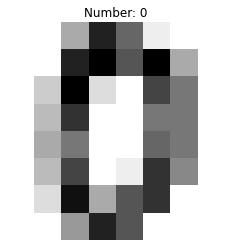

In [11]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0], cmap=plt.cm.gray_r)
plt.axis('off')
plt.title('Number: '+str(y[0]))
None

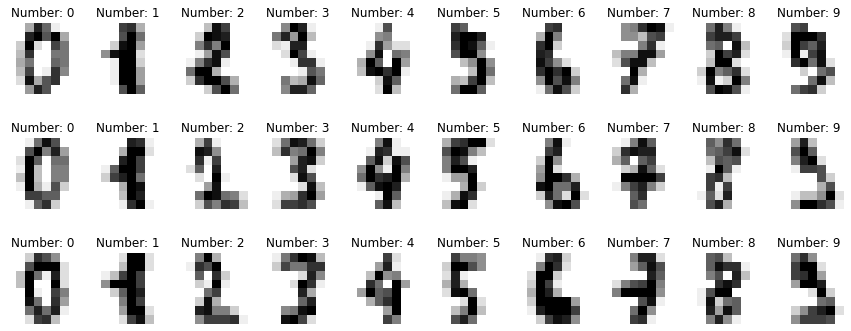

In [12]:
figure, axes = plt.subplots(3,10, figsize = (15,6))

for ax,image,number in zip(axes.ravel(), digits.images, y):
  ax.axis('off')
  ax.imshow(image, cmap=plt.cm.gray_r)
  ax.set_title('Number: '+str(number))

In [13]:
image = digits.images[0]
print('original image data = ')
print(image)
print()

image_flattened = image.ravel()
print('flattened image = ')
print(image_flattened)
print()

print('feature data for a sample = ')
print(x[0])
print()

print('Feature data for all samples is a 8x8 2D array = ')
print(x)

original image data = 
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]

flattened image = 
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

feature data for a sample = 
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]

Feature data for all samples is a 8x8 2D array = 
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=99, stratify=y)

In [15]:
x_train.shape
x_test.shape
y_train.shape
y_test.shape

(594,)

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
y_pred = knn.predict(x_test)

In [18]:
y_pred

array([0, 9, 4, 7, 0, 6, 5, 8, 3, 5, 1, 1, 6, 6, 1, 9, 1, 3, 8, 0, 0, 1,
       4, 3, 7, 5, 1, 5, 2, 3, 5, 0, 5, 2, 2, 3, 0, 6, 9, 3, 4, 9, 7, 4,
       5, 8, 7, 2, 5, 1, 6, 7, 7, 8, 4, 5, 1, 0, 3, 7, 6, 7, 0, 7, 3, 6,
       7, 2, 6, 1, 5, 0, 3, 9, 3, 1, 0, 4, 3, 0, 2, 7, 3, 7, 7, 9, 1, 4,
       7, 4, 1, 5, 1, 0, 4, 0, 8, 7, 6, 7, 9, 9, 4, 4, 8, 9, 0, 8, 3, 8,
       5, 5, 2, 2, 4, 0, 8, 3, 2, 2, 9, 5, 3, 6, 9, 2, 9, 0, 0, 0, 0, 5,
       4, 2, 8, 6, 9, 4, 4, 6, 7, 3, 8, 0, 6, 7, 2, 1, 8, 0, 7, 3, 1, 7,
       4, 3, 4, 2, 1, 5, 3, 3, 6, 9, 2, 2, 0, 6, 7, 8, 1, 7, 3, 8, 2, 5,
       4, 9, 2, 0, 5, 0, 9, 1, 1, 2, 8, 7, 7, 6, 5, 5, 7, 6, 0, 5, 7, 1,
       4, 5, 9, 0, 5, 1, 9, 9, 5, 6, 6, 7, 4, 9, 5, 4, 8, 8, 1, 3, 3, 1,
       2, 2, 9, 1, 9, 6, 4, 3, 8, 5, 0, 9, 2, 8, 4, 6, 0, 2, 7, 2, 3, 6,
       1, 8, 9, 5, 6, 0, 8, 5, 8, 6, 5, 0, 3, 1, 7, 0, 7, 2, 8, 5, 1, 5,
       6, 9, 3, 0, 0, 3, 9, 4, 5, 0, 6, 1, 3, 3, 7, 4, 1, 4, 0, 7, 1, 7,
       2, 6, 5, 9, 0, 0, 9, 6, 6, 0, 5, 4, 0, 1, 4,

In [20]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.95      0.98      0.97        60
           2       1.00      0.98      0.99        59
           3       1.00      0.98      0.99        60
           4       1.00      1.00      1.00        60
           5       0.97      0.98      0.98        60
           6       1.00      1.00      1.00        60
           7       0.97      1.00      0.98        59
           8       1.00      0.95      0.97        58
           9       0.98      0.98      0.98        59

    accuracy                           0.99       594
   macro avg       0.99      0.99      0.99       594
weighted avg       0.99      0.99      0.99       594



In [21]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true= y_test, y_pred=y_pred)
confusion

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 59,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  0, 58,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 59,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 60,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 59,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 60,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 59,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 55,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 58]])

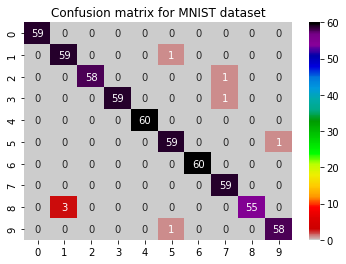

In [22]:
import seaborn as sns
s=sns.heatmap(confusion, annot=True, cmap= 'nipy_spectral_r')
s.set_title('Confusion matrix for MNIST dataset')
None

In [25]:
from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print(f'acc = {acc:.4}')
acc = metrics.balanced_accuracy_score(y_test, y_pred)
print(f'balanced_acc = {acc:.4}')

acc = 0.9865
balanced_acc = 0.9864
